In [2]:
# import packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px
from matplotlib.sankey import Sankey
import numpy as np

In [1]:
yellowC = '#f2ec83'
violetC = '#b685ba'
pinckC = '#FF9999'
darckGreenC = '#779945'
greenC = '#70bb03'


### Text Chapter 1. 
Cohort description

In [18]:
path = '/Users/katerynapantiukh/Documents/1MyDisk/PhD/!MAIN_data/'
#path = '/Users/ketpantuh/Documents/1MyDisk/PhD/!MAIN_data/' # macbook

# samples subsets
ovr = pd.read_excel('Ugly_samples_mystery/results/Kraken2_overlaping_sp.xlsx')
smpls = ovr['sample_name']

# read meta data
meta = pd.read_excel('Ugly_samples_mystery/input/EstMB_phenotype_data.xlsx', index_col=False)
metaC = meta[['gender', 'Age_at_MBsample', 'BMI','skood']]
# read match file
mtch = pd.read_excel('Ugly_samples_mystery/input/MB_scode_vcode.xlsx')
mtch = mtch[['skood', 'vkood']]
metaC = metaC.merge(mtch, on='skood', how='inner')
metaC = metaC.merge(smpls, left_on='vkood', right_on='sample_name', how='inner')
len(metaC)

# BGI reads info
bgi = pd.read_csv('Ugly_samples_mystery/input/ReadsNumb_BGI.csv')
bgi['sample_name'] = bgi['name'].str.split('_').str[1]
bgi.rename(columns={"name": "BGI_reads_file", "reads_numb": "BGI_reads_numb"}, inplace=True)
bgi = bgi.sort_values(by=['BGI_reads_numb'])
bgi = bgi.merge(smpls, on='sample_name', how='inner')
len(bgi)

# BGI reads info
ill = pd.read_csv('Ugly_samples_mystery/input/ReadsNumb_Illumina.csv')
ill.rename(columns={"nameS": "sample_name", "reads_numb": "Ill_reads_numb"}, inplace=True)
ill = ill.sort_values(by=['Ill_reads_numb'])
ill = ill.merge(smpls, on='sample_name', how='inner')
len(ill)


1990

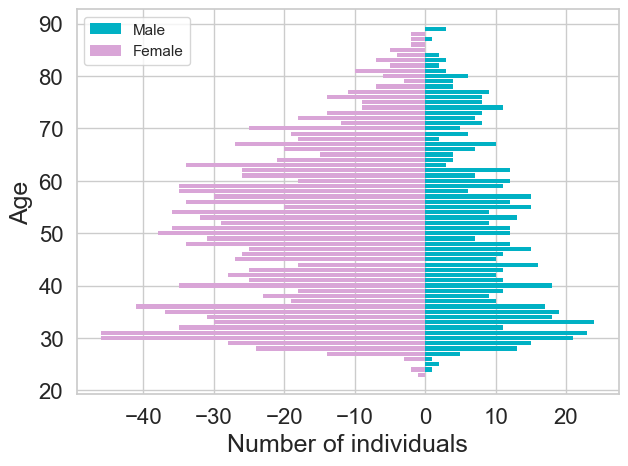

In [21]:
sns.set(style="whitegrid")
# Group the data by 'gender' and 'age' and count the number of cases for each age
age_counts = metaC.groupby(['gender', 'Age_at_MBsample']).size().unstack()
age_counts = age_counts.reset_index(drop=True).T.reset_index()

# Create a pyramid chart
fig, ax = plt.subplots(figsize=(7, 5))

# Plot the pyramid chart for males and females
ax.barh(age_counts.Age_at_MBsample, age_counts[0], label='Male', color='#00b1c4', linewidth=0.01)
ax.barh(age_counts.Age_at_MBsample, -age_counts[1], label='Female', color='#d9a5d7', linewidth=0.01)
ax.set_xlabel('Number of individuals', fontsize=18)
ax.set_ylabel('Age', fontsize=18)
#ax.set_title('Age Distribution Pyramid for Males and Females', fontsize=18)
ax.legend()
plt.tick_params(labelsize=16)
plt.savefig('results/Fig1b_Pyramid.svg', bbox_inches='tight')
plt.savefig('results/Fig1b_Pyramid.png', bbox_inches='tight')

plt.show()

In [24]:
rn = bgi.merge(ill, on='sample_name', how='inner')
rn['b'] = rn['BGI_reads_numb'] / 1000000
rn['i'] = rn['Ill_reads_numb'] / 1000000
rn.head(2)

,BGI_reads_file,BGI_reads_numb,sample_name,Ill_reads_numb
0,lab68_VORP1W_E100013128_L01,19993536,VORP1W,13233320
1,lab66_V3PRGW_E100013128_L01,20274738,V3PRGW,14875113


In [45]:
# calculate illumina reads count per each 5 million step from 0 to 120 millions
bgi_r = []
for i in range(0, 120, 5):
    bgi_r.append(len(rn[(rn['b'] >= i) & (rn['i'] < i + 5)]))
bgi_r = pd.DataFrame(bgi_r, columns=['ill_reads'])
bgi_r['range'] = bgi_r.index * 5
bgi_r['range'] = bgi_r['range'].astype(str) + '-' + bgi_r['range'].astype(str) + 'M'
bgi_r

,ill_reads,range
0,0,0-0M
1,0,5-5M
2,853,10-10M
3,1849,15-15M
4,1848,20-20M
5,1808,25-25M
6,1749,30-30M
7,1654,35-35M
8,1524,40-40M
9,1336,45-45M


In [43]:
# calculate illumina reads count per each 5 million step from 0 to 120 millions
ill_r = []
for i in range(0, 120, 5):
    ill_r.append(len(rn[(rn['i'] >= i) & (rn['i'] < i + 5)]))
ill_r = pd.DataFrame(ill_r, columns=['ill_reads'])
ill_r['range'] = ill_r.index * 5
ill_r['range'] = ill_r['range'].astype(str) + '-' + ill_r['range'].astype(str) + 'M'
ill_r

,ill_reads,range
0,0,0-0M
1,0,5-5M
2,853,10-10M
3,996,15-15M
4,0,20-20M
5,0,25-25M
6,0,30-30M
7,0,35-35M
8,0,40-40M
9,0,45-45M


In [38]:
# calculate illumina reads count per each 5 million step from 0 to 120 millions


rn['i_5'] = rn['i'].apply(lambda x: int(x / 5) * 5)
rn['b_5'] = rn['b'].apply(lambda x: int(x / 5) * 5)

rn

,BGI_reads_file,BGI_reads_numb,sample_name,Ill_reads_numb,b,i,i_5,b_5
0,lab68_VORP1W_E100013128_L01,19993536,VORP1W,13233320,19.993536,13.233320,10,15
1,lab66_V3PRGW_E100013128_L01,20274738,V3PRGW,14875113,20.274738,14.875113,10,20
2,lab64_VCG11X_E100013104_L01,20421023,VCG11X,17738531,20.421023,17.738531,15,20
3,lab70_VUSPBL_E100013104_L01,20422049,VUSPBL,15246326,20.422049,15.246326,15,20
4,lab67_V7O2TS_E100013128_L01,20492244,V7O2TS,16289138,20.492244,16.289138,15,20
...,...,...,...,...,...,...,...,...
1844,lab65_VIGZJL_E100009887_L01,114190394,VIGZJL,14430007,114.190394,14.430007,10,110
1845,lab64_VC0JXP_E100009727_L01,115873230,VC0JXP,15654875,115.873230,15.654875,15,115
1846,lab70_VR684N_E100013135_L01,115956400,VR684N,13299891,115.956400,13.299891,10,115
1847,lab68_VLB6XN_E100013465_L01,116028079,VLB6XN,13167518,116.028079,13.167518,10,115


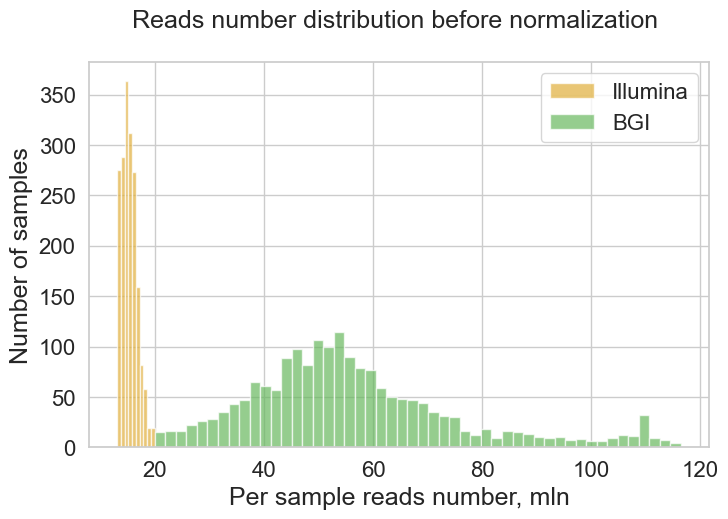

In [60]:
plt.figure(figsize=(8,5))
sns.set(style="whitegrid")

plt.hist(rn['i'], bins=10, color='#e0af3a', alpha=0.7)
plt.hist(rn['b'], bins=50, color='#68b85f', alpha=0.7)
plt.xlabel('Per sample reads number, mln', fontsize=18)
plt.ylabel('Number of samples', fontsize=18)
#plt.xlim(15,120)
# label size
plt.tick_params(labelsize=16)
plt.legend(['Illumina', 'BGI'], fontsize=16)
plt.title('Reads number distribution before normalization \n', fontsize=18)

plt.savefig('results/Fig1c_ReadsNumb1.svg', bbox_inches='tight')
plt.savefig('results/Fig1c_ReadsNumb1.png', bbox_inches='tight')

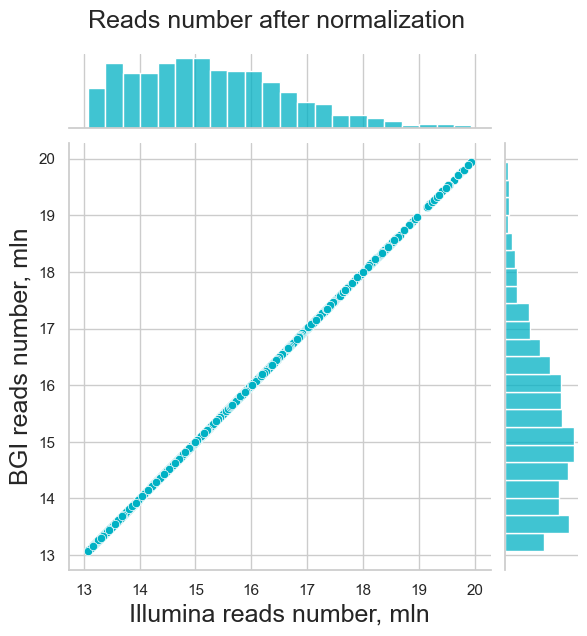

In [59]:
# Create a pyramid chart
sns.jointplot(data=rn, x='i', y='i', color='#00b1c4')
plt.title('Reads number after normalization \n \n \n \n', fontsize=18)
plt.xlabel('Illumina reads number, mln', fontsize=18)
plt.ylabel('BGI reads number, mln', fontsize=18)

plt.savefig('results/Fig1c_ReadsNumb2.svg', bbox_inches='tight')
plt.savefig('results/Fig1c_ReadsNumb2.png', bbox_inches='tight')

In [26]:
# BGI reads size
bgiRsize = pd.read_csv('input/reads_size_full_BGI.csv', sep='\t')
bgiRsize['sample_name'] = bgiRsize['name'].str.split('_').str[1]

bgiRsize.rename(columns={"name": "BGI_reads_file"}, inplace=True)
bgiRsize["BGI_reads_size"] = bgiRsize["size"] *2
bgiRsize = bgiRsize.sort_values(by=['BGI_reads_size'])
bgiRsize = bgiRsize.merge(smpls, on='sample_name', how='inner')

print('Number of BGI samples is ', str(len(bgiRsize)))
#print('Mean size of BGI reads files is ', str(bgiRsize["BGI_reads_size"].mean()), '+/-',str(bgiRsize["BGI_reads_size"].std()), 'kilobytes')
print('or ', str(bgiRsize["BGI_reads_size"].mean()/1048576)[0:5], '+/-',str(bgiRsize["BGI_reads_size"].std()/1048576)[0:5], 'Gb')

# Illumina reads size
print('---')
illRsize = pd.read_csv('input/reads_size_full_Illumina.csv', sep='\t')
illRsize['sample_name'] = illRsize['name'].str.split('_').str[1]

illRsize.rename(columns={"name": "Ill_reads_file"}, inplace=True)
illRsize["Ill_reads_size"] = illRsize["size"] *2
illRsize = illRsize.sort_values(by=['Ill_reads_size'])
#illRsize = illRsize.merge(smpls, on='sample_name', how='inner')

print('Number of Illumina samples is ', str(len(illRsize)))
#print('Mean size of Illumina reads files is ', str(illRsize["Ill_reads_size"].mean()), '+/-',str(illRsize["Ill_reads_size"].std()), 'kilobytes')
print('or ', str(illRsize["Ill_reads_size"].mean()/1048576)[0:5], '+/-',str(illRsize["Ill_reads_size"].std()/1048576)[0:5], 'Gb')

Number of BGI samples is  1878
or  11.73 +/- 3.908 Gb
---
Number of Illumina samples is  2509
or  1.959 +/- 0.202 Gb


In [49]:
ill = pd.read_csv('input/ReadsNumb_Illumina.csv', sep=',')

print('Mean BGI reads number is ', str(bgi['BGI_reads_numb'].mean()/1000000)[0:5], '+/-',str(bgi['BGI_reads_numb'].std()/1000000)[0:5], 'mln')
print('Mean Illumina reads number is ', str(ill['reads_numb'].mean()/1000000)[0:5], '+/-',str(ill['reads_numb'].std()/1000000)[0:4], 'mln')
#bgi['BGI_reads_numb'].mean()



Mean BGI reads number is  56.13 +/- 19.37 mln
Mean Illumina reads number is  15.31 +/- 1.55 mln


In [50]:
# smpls
print('Number of analysed samples:', len(smpls), '\n')

# meta
print('Females: ', len(metaC[metaC['gender'] == 1]))
print('Males: ', len(metaC[metaC['gender'] == 0]))
print('Min age: ', metaC['Age_at_MBsample'].min())
print('Max age: ', metaC['Age_at_MBsample'].max(), '\n')

# reads
r = bgi['BGI_reads_numb'].mean()
print('Average Reads number per sample: ', (r/1000000).round(2), 'mln', '\n')

# mags
print('Number of all extracted genomes:', len(all))
print('Number of HQ rep MAGs:', len(all[all['bin_qual'] == 'HQ']), '(', str(len(all[all['bin_qual'] == 'HQ'])/len(all)*100)[0:5], '%)')
print('Number of good enough rep genomes for clustered to sp.:', len(all_hq), '(', str(len(all_hq)/len(all)*100)[0:5], '%)', '\n')

print('Median Completeness for all mags is:', all['completeness'].median())
print('Median Contamination for all mags is:', all['contamination'].median())
# calculate IQR1
data = all['completeness']
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1
print("Interquartile Range (IQR), completeness:", q1, '-', q3)
# calculate IQR2
data = all['contamination']
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1
print("Interquartile Range (IQR), contamination:", q1, '-', q3, '\n')

print('Average number of extracted genomes per sample is:', str(len(all)/1878)[0:5], '\n')

# rep mags
print('Number of representative genomes:', len(rep))
print('Number of HQ+mimag rep MAGs:', len(rep[rep['MAG_qual'] == 'HQ'])+len(rep[rep['MAG_qual'] == 'HQ_mimag']), '(', str((len(rep[rep['MAG_qual'] == 'HQ'])+len(rep[rep['MAG_qual'] == 'HQ_mimag']))/len(rep)*100)[0:5], '%)')
print('Number of mimag rep MAGs:', len(rep[rep['MAG_qual'] == 'HQ_mimag']), '(', str(len(rep[rep['MAG_qual'] == 'HQ_mimag'])/len(rep)*100)[0:5], '%)')

print('Median Completeness for representative genomes is:', rep['Completeness'].median())
print('Median Contamination for representative genomes is:', rep['Contamination'].median())
# calculate IQR1
data = rep['Completeness']
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1
print("Interquartile Range (IQR), completeness:", q1, '-', q3)
# calculate IQR2
data = rep['Contamination']
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1
print("Interquartile Range (IQR), contamination:", q1, '-', q3)

Number of analysed samples: 1878 

Females:  1308
Males:  570
Min age:  23.0
Max age:  89.0 

Average Reads number per sample:  56.13 mln 

Number of all extracted genomes: 84762
Number of HQ rep MAGs: 42049 ( 49.60 %)
Number of good enough rep genomes for clustered to sp.: 69333 ( 81.79 %) 

Median Completeness for all mags is: 93.1
Median Contamination for all mags is: 1.72
Interquartile Range (IQR), completeness: 84.48 - 98.28
Interquartile Range (IQR), contamination: 0.0 - 4.47 

Average number of extracted genomes per sample is: 45.13 

Number of representative genomes: 2257
Number of HQ+mimag rep MAGs: 1647 ( 72.97 %)
Number of mimag rep MAGs: 475 ( 21.04 %)
Median Completeness for representative genomes is: 95.55
Median Contamination for representative genomes is: 0.57
Interquartile Range (IQR), completeness: 90.82 - 98.64
Interquartile Range (IQR), contamination: 0.14 - 1.81


In [5]:
phy = rep['phylum'].value_counts()
phy = phy.reset_index()
phy.rename(columns={'index': "phylum", 'phylum': "count"}, inplace=True)
print('Number of detected phyla:',len(phy))
phy['perc'] = phy['count']/len(rep)*100
print('Together main 3 phyla include:', str(phy['perc'].head(3).sum())[0:5],'% of rep MAGs')
phy.head(3)


Number of detected phyla: 20
Together main 3 phyla include: 78.06 % of rep MAGs


,phylum,count,perc
0,Bacillota_A,1213,53.743908
1,Bacteroidota,337,14.931325
2,Bacillota,212,9.393000


In [6]:
sp = rep[['sp','MAGs_per_cluster']].head()
sp['perc'] = sp['MAGs_per_cluster']/len(smpls)*100
sp

,sp,MAGs_per_cluster,perc
0,Odoribacter splanchnicus,1332,70.926518
1,Barnesiella intestinihominis,1180,62.832801
2,Parabacteroides distasonis,1134,60.383387
3,Alistipes putredinis,1024,54.526092
4,Agathobacter rectalis,975,51.916933


### Text Chapter 2. 
Potentially new species and comparison population specific reference with global reference UHGG

In [7]:
print('New sp number:', len(rep[rep['sp'] == 'undefined']))
print('New sp perc:', str(len(rep[rep['sp'] == 'undefined'])/len(rep)*100)[0:5],'%')

newsp = rep[rep['sp'] == 'undefined']
print('Number of both HQ+mimag new sp MAGs:', len(newsp[newsp['MAG_qual'] == 'HQ'])+len(newsp[newsp['MAG_qual'] == 'HQ_mimag']), '(', str((len(newsp[newsp['MAG_qual'] == 'HQ'])+len(newsp[newsp['MAG_qual'] == 'HQ_mimag']))/len(newsp)*100)[0:5], '%)')
print('Number of mimag only HQ new sp MAGs:', len(newsp[newsp['MAG_qual'] == 'HQ_mimag']), '(', str(len(newsp[newsp['MAG_qual'] == 'HQ_mimag'])/len(newsp)*100)[0:5], '%)','\n')

print('Number new sp with 1 MAG:', len(newsp[newsp['MAGs_per_cluster'] == 1]), '(', str(len(newsp[newsp['MAGs_per_cluster'] == 1])/len(newsp)*100)[0:5], '%)')
print('New sp MAGs recovered from more then 1% of samples (>18):', len(newsp[newsp['MAGs_per_cluster'] >= 18]))
print('New sp MAGs unique genus:', len(newsp['genus'].unique()))

New sp number: 353
New sp perc: 15.64 %
Number of both HQ+mimag new sp MAGs: 231 ( 65.43 %)
Number of mimag only HQ new sp MAGs: 57 ( 16.14 %) 

Number new sp with 1 MAG: 233 ( 66.00 %)
New sp MAGs recovered from more then 1% of samples (>18): 5
New sp MAGs unique genus: 182


In [8]:
# present at USGG and not-new sp
c = len(rep[(rep['present_at_UHGG'] == 'EstMAG_overlap') & (rep['sp'] != 'undefined')])
print('Number of EstMAGs present at UHGG and not-new sp:', c)

# present at USGG and new sp
c = len(rep[(rep['present_at_UHGG'] == 'EstMAG_overlap') & (rep['sp'] == 'undefined')])
print('Number of EstMAGs present at UHGG and new sp:', c)

# not present at USGG and not-new sp
c = len(rep[(rep['present_at_UHGG'] != 'EstMAG_overlap') & (rep['sp'] != 'undefined')])
print('Number of EstMAGs not present at UHGG and not-new sp:', c)

# not present at USGG and new sp
c = len(rep[(rep['present_at_UHGG'] != 'EstMAG_overlap') & (rep['sp'] == 'undefined')])
print('Number of EstMAGs not present at UHGG and new sp:', c)

print('total:', 1576+74+328+279)

Number of EstMAGs present at UHGG and not-new sp: 1576
Number of EstMAGs present at UHGG and new sp: 74
Number of EstMAGs not present at UHGG and not-new sp: 328
Number of EstMAGs not present at UHGG and new sp: 279
total: 2257


In [9]:
# Calclate cumulative number of undefined species
nsp = all_hq[['bin_name', 'sp', 'rep_MAG_ID']]
nsp['sample_name'] = nsp['bin_name'].str.split('_').str[0]
mrg = nsp.drop('bin_name', axis=1)

samples_df = pd.DataFrame(mrg['sample_name'].unique(), columns=['sample_name'])
undefined_unique_per_cluster = mrg[mrg['sp'] == 'undefined'].drop_duplicates(subset=['rep_MAG_ID'])
undefined_counts = undefined_unique_per_cluster.groupby('sample_name').size().reset_index(name='undefined_count')
samples_df = pd.merge(samples_df, undefined_counts, on='sample_name', how='left').fillna({'undefined_count': 0})
samples_df['cumulative_undefined'] = samples_df['undefined_count'].cumsum()

#samples_df.to_excel('results/cumulative_undefined.xlsx')
samples_df.tail(2)

/var/folders/5j/pvj6k02n3mn9ztpn77vjtfzw0000gn/T/ipykernel_47164/662146023.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nsp['sample_name'] = nsp['bin_name'].str.split('_').str[0]


,sample_name,undefined_count,cumulative_undefined
1876,VJB0XB,0.0,353.0
1877,VV5SGU,0.0,353.0


In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Reshape index for scikit-learn
X = samples_df.index.values.reshape(-1, 1)  # Independent variable
y = samples_df['cumulative_undefined']  # Dependent variable

# Create and fit the model
model = LinearRegression(fit_intercept=False).fit(X, y)

# Print the coefficients
print('Intercept:', model.intercept_)
print('Slope:', model.coef_[0])
# Calculate and print the R^2 score
r2_score = model.score(X, y)
print('R^2:', r2_score)

y_pred = model.predict(X)

# Calculate expected amount of new species for N samples
n = 500
print('\n Expected amount of new species for', n, 'samples:', (model.intercept_+n*model.coef_[0]).round(0))

Intercept: 0.0
Slope: 0.20471383847898061
R^2: 0.9777092700806336

 Expected amount of new species for 500 samples: 102.0


In [14]:
# Comparing with global reference UHGG
print('Number of rep MAGs overlap with UHGG:', len(rep[rep['present_at_UHGG'] == 'EstMAG_overlap']), '(', 
str(len(rep[rep['present_at_UHGG'] == 'EstMAG_overlap'])/len(rep)*100)[0:5], '%)')
print('Number of rep MAGs Non-overlap with UHGG:', len(rep[rep['present_at_UHGG'] != 'EstMAG_overlap']), '(', 
str(len(rep[rep['present_at_UHGG'] != 'EstMAG_overlap'])/len(rep)*100)[0:5], '%)')


Number of rep MAGs overlap with UHGG: 1650 ( 73.10 %)
Number of rep MAGs Non-overlap with UHGG: 607 ( 26.89 %)


### Text Chapter 3. 
Estimation of microbiome composition

In [10]:
# calculate number mags per sample
all['sample_name'] = all['bin_name'].str.split('_').str[0]
mN = all['sample_name'].value_counts()
mN = mN.reset_index()
mN.rename(columns={'index': "sample", 'sample_name': "count"}, inplace=True)

# calculate number sp hit per sample
ab = abud.copy()
ab['non_zero'] = ab.astype(bool).sum(axis=1)
pN = ab[['index', 'non_zero']]

# merge
mrgN = mN.merge(pN, left_on='sample', right_on='index', how='inner')

In [11]:
# calculate non zero values for each raw
ab = abud.copy()
ab.drop('index', axis=1, inplace=True)
ab['non_zero'] = ab.astype(bool).sum(axis=1)

print('Average number of detected by mapping sp per sample:', str(ab['non_zero'].mean())[0:6])
print('Average number of extracted genomes per sample is:', str(len(all)/1878)[0:5])

Average number of detected by mapping sp per sample: 389.41
Average number of extracted genomes per sample is: 45.13


### Figure 1. Workflow for MAG Reconstruction and Species-Level Clustering 
Panel A. A general algorithm aimed at discovering new or strengthened correlations between phenotypes and the microbiome
- Check the separate pictures

Panel B. Gender/Age destribution

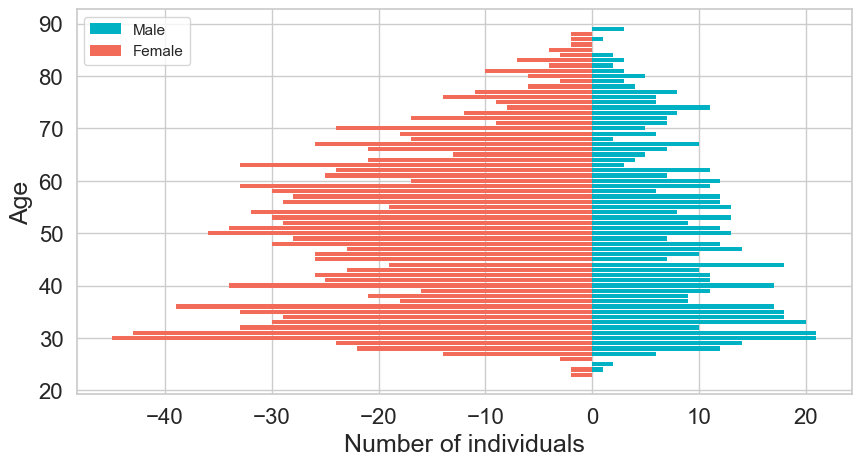

In [4]:
sns.set(style="whitegrid")
# Group the data by 'gender' and 'age' and count the number of cases for each age
age_counts = metaC.groupby(['gender', 'Age_at_MBsample']).size().unstack()
age_counts = age_counts.reset_index(drop=True).T.reset_index()

# Create a pyramid chart
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the pyramid chart for males and females
ax.barh(age_counts.Age_at_MBsample, age_counts[0], label='Male', color='#00b1c4', linewidth=0.01)
ax.barh(age_counts.Age_at_MBsample, -age_counts[1], label='Female', color='#f26b58', linewidth=0.01)
ax.set_xlabel('Number of individuals', fontsize=18)
ax.set_ylabel('Age', fontsize=18)
#ax.set_title('Age Distribution Pyramid for Males and Females', fontsize=18)
ax.legend()
plt.tick_params(labelsize=16)
plt.savefig('results/Fig1b_Pyramid.svg', bbox_inches='tight')
plt.savefig('results/Fig1b_Pyramid.png', bbox_inches='tight')

plt.show()

Panel C. Reads number

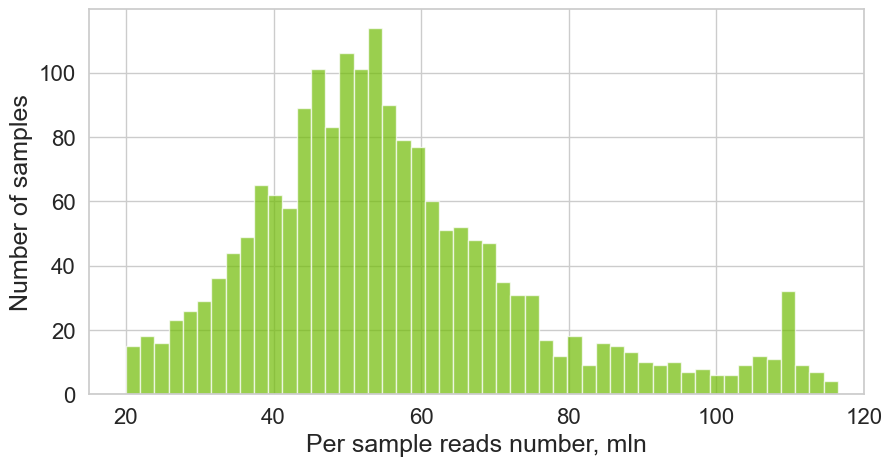

In [18]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")

plt.hist(bgi['BGI_reads_numb']/1000000, bins=50, color='#70bb03', alpha=0.7)
plt.xlabel('Per sample reads number, mln', fontsize=18)
plt.ylabel('Number of samples', fontsize=18)
plt.xlim(15,120)
# label size
plt.tick_params(labelsize=16)
plt.savefig('results/Fig1c_ReadsNumb.svg', bbox_inches='tight')
plt.savefig('results/Fig1c_ReadsNumb.png', bbox_inches='tight')

Panel D. Picture with a pipeline
- Check the separate pictures
  
Panel E. Representative MAGs quality

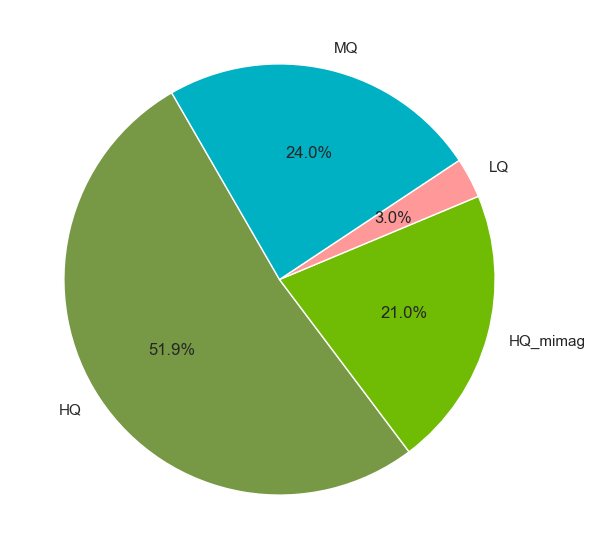

In [4]:
mq = rep['MAG_qual'].value_counts()
mq = mq.reset_index()
mq.rename(columns={'index': "mq", 'MAG_qual': "count"}, inplace=True)

mq = mq.sort_values(by='mq')

mq = rep['MAG_qual'].value_counts()
mq = mq.reset_index()
mq.rename(columns={'index': "mq", 'MAG_qual': "count"}, inplace=True)
mq = mq.sort_values(by='mq')

plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")

# draw a pie plot
plt.pie(mq['count'], labels=mq['mq'], autopct='%1.1f%%', startangle=120, colors=['#779945', '#70bb03', '#FF9999', '#00b1c4'])

plt.savefig('results/Fig1e_mq.png', dpi=300, bbox_inches='tight')
plt.savefig('results/Fig1e_mq.svg', bbox_inches='tight')

In [5]:
mq

,mq,count
0,HQ,1172
2,HQ_mimag,475
3,LQ,68
1,MQ,542


Panel F. Representative MAGs Completeness

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/seaborn/categorical.py:3399: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


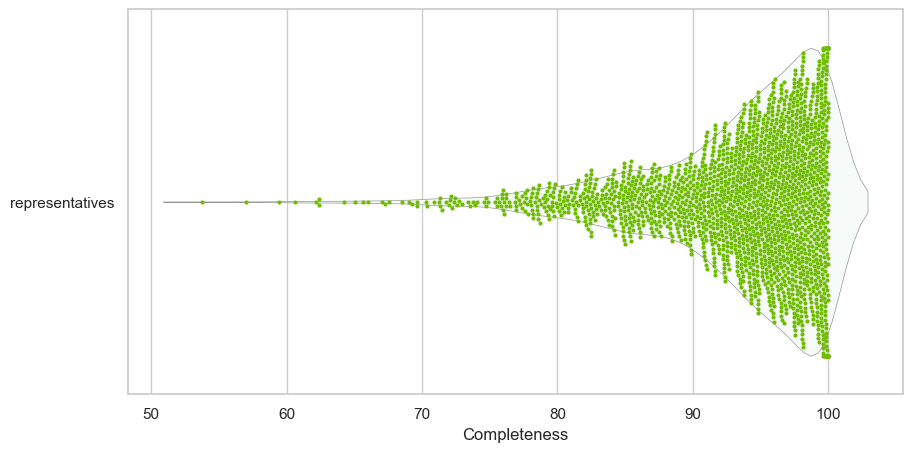

In [20]:
df = rep.copy()
df['name'] = 'representatives'

plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")
ax = sns.swarmplot(y="name", x="Completeness", data=df, size=3, color='#70bb03')
ax = sns.violinplot(y="name", x="Completeness", data=df, color='#f5fcfa',linewidth=0.5, inner=None)
plt.ylabel('')

plt.savefig('results/Fig1f_completness_cm2.png', dpi=300, bbox_inches='tight')
plt.savefig('results/Fig1f_completness_cm2.svg', bbox_inches='tight')

Panel G. Representative MAGs Contamination

/Users/ketpantuh/Library/Python/3.8/lib/python/site-packages/seaborn/categorical.py:3399: UserWarning: 40.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


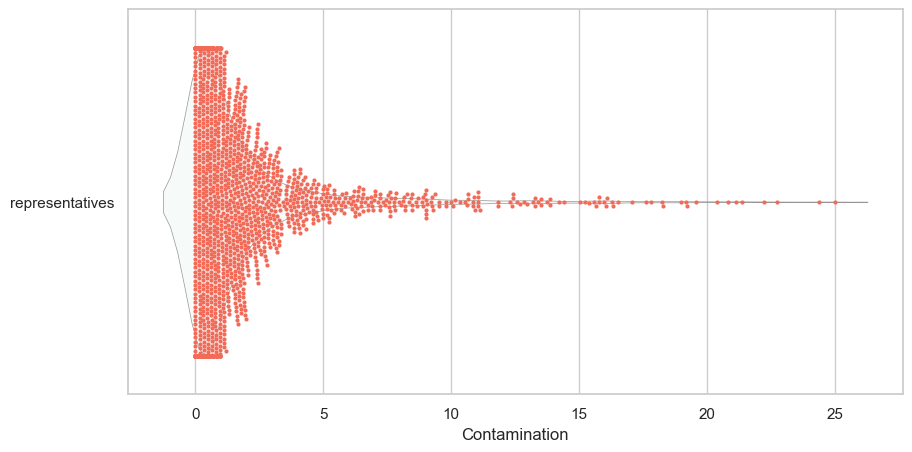

In [21]:
df['name'] = 'representatives'

plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")
ax = sns.swarmplot(y="name", x="Contamination", data=df, size=3, color='#f26b58')
ax = sns.violinplot(y="name", x="Contamination", data=df, color='#f5fcfa',linewidth=0.5, inner=None)
plt.ylabel('')

plt.savefig('results/Fig1g_contamination_cm2.png', dpi=300, bbox_inches='tight')
plt.savefig('results/Fig1g_contamination_cm2.svg', bbox_inches='tight')

### Figure 2. Comparison of population specific reference with global references 
Panel A. Presence at GTDB and USGG DBs

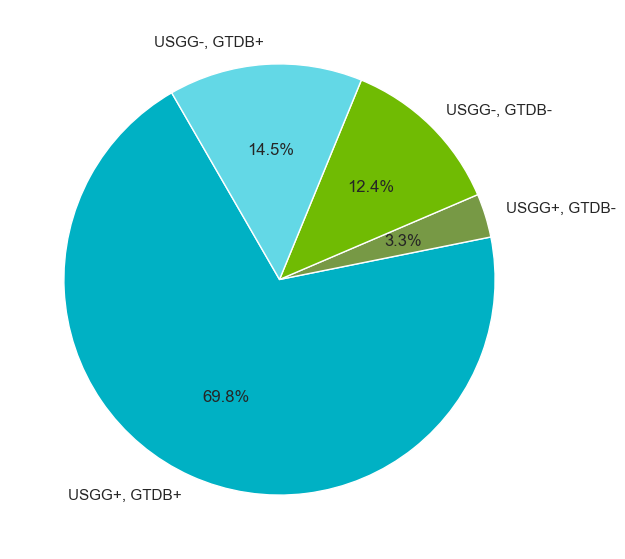

In [10]:
plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")
plt.tick_params(labelsize=20)

# draw a pie plot
plt.pie([1576,74,279,328], labels=['USGG+, GTDB+','USGG+, GTDB-','USGG-, GTDB-','USGG-, GTDB+'], 
        autopct='%1.1f%%', startangle=120, colors=['#00b1c4', '#779945', '#70bb03', '#63d8e6'])


plt.savefig('results/Fig2a.png', dpi=300, bbox_inches='tight')
plt.savefig('results/Fig2a.svg', bbox_inches='tight')

Panel B. Aggregated amount of a new species

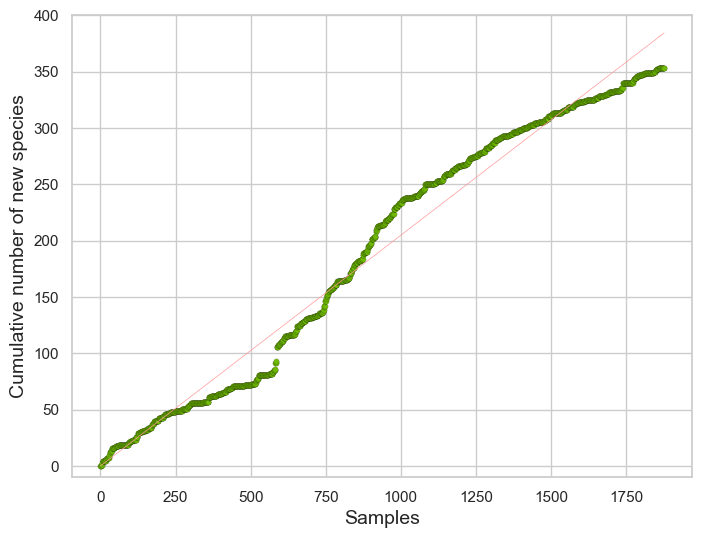

In [23]:
plt.figure(figsize=(8, 6))

plt.scatter(samples_df.index, samples_df['cumulative_undefined'], color='#70bb03', s=15, alpha=0.9, 
            label='Cumulative number of undefined species', edgecolors='black', linewidths=0.1)

plt.xlabel('Samples', fontsize=14)
plt.ylabel('Cumulative number of new species', fontsize=14)
plt.plot(X, y_pred, color=pinckC, linewidth=0.5, label='Regression line')  
plt.ylim(-10,400)
plt.grid()
plt.grid()

plt.savefig('results/2b_cumm1.png', dpi=300, bbox_inches='tight')
plt.savefig('results/2b_cumm1.svg', bbox_inches='tight')

Panel C. 

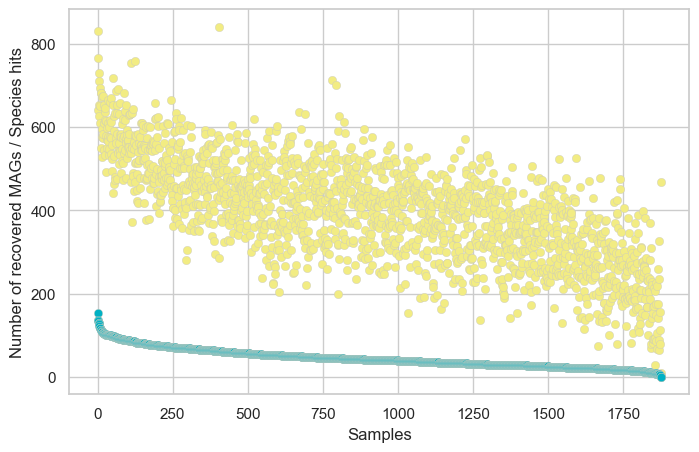

In [24]:
# rename columns
mrgN.columns = ['sample', 'MAGs number','sample_name' , 'Species hits']
# Calculate rolling mean
window_size = 100  
rolling_mean = mrgN['Species hits'].rolling(window=window_size).mean()

sns.set(style="whitegrid")
# Create a plot
fig, ax = plt.subplots(figsize=(8, 5))

sns.scatterplot(data=mrgN, x=mrgN.index, y='Species hits', ax=ax, color='#f2ec83', edgecolor='#cccbbe', linewidth=0.3)
sns.scatterplot(data=mrgN, x=mrgN.index, y='MAGs number', ax=ax, color='#00b1c4', edgecolor='#cccbbe',linewidth=0.3)

plt.xlabel('Samples')
plt.ylabel('Number of recovered MAGs / Species hits')

# Plot rolling mean
#plt.plot(mrgN.index, rolling_mean, color='black', label=f'Rolling Mean ({20} window)')

plt.savefig('results/2c_mags_vs_detect.png', dpi=300, bbox_inches='tight')
plt.savefig('results/2c_mags_vs_detect.svg', bbox_inches='tight')

Panel D. Prevalence by group

In [46]:
# prevalence by type
prevG = rep[['rep_MAG_ID', 'prev_count', 'prevalence', 'sp', 'present_at_UHGG','MAGs_per_cluster']].copy()  # Make a copy to avoid SettingWithCopyWarning

conditions = [
    (prevG['present_at_UHGG'] == 'EstMAG_overlap') & (prevG['sp'] == 'undefined'),
    (prevG['present_at_UHGG'] == 'EstMAG_overlap') & (prevG['sp'] != 'undefined'),
    (prevG['present_at_UHGG'] != 'EstMAG_overlap') & (prevG['sp'] == 'undefined'),
    (prevG['present_at_UHGG'] != 'EstMAG_overlap') & (prevG['sp'] != 'undefined')]

choices = [
    'GTBD-, USGG+',
    'GTBD+, USGG+',
    'GTBD-, USGG-',
    'GTBD+, USGG-']

prevG['type'] = np.select(conditions, choices, default=np.nan)
prevG = prevG.sort_values(by='type')


/Users/katerynapantiukh/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3544: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/katerynapantiukh/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3544: UserWarning: 40.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/katerynapantiukh/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3544: UserWarning: 50.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/katerynapantiukh/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:3544: UserWarning: 43.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Use

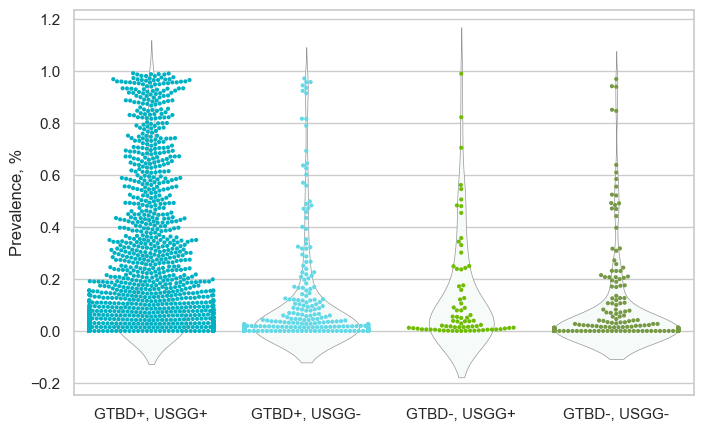

In [49]:
# colors
darckGreenC = '#779945'
greenC = '#70bb03'
darkBlueC = '#00b1c4'
blueC = '#63d8e6'

# Define colors for each type
clr = {'USGG+, GTDB+': darkBlueC,
       'USGG+, GTDB-': blueC,
       'USGG-, GTDB-': greenC,
       'USGG-, GTDB+': darckGreenC}

# Compare prevalence of overlaped and non-overlaped species
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")

ax = sns.swarmplot(x="type", y="prevalence", data=prevG, hue="type", size=3, palette=clr.values())
ax = sns.violinplot(x="type", y="prevalence", data=prevG, color='#f5fcfa',linewidth=0.5, inner=None)
# legend false
plt.legend([],[], frameon=False)
#plt.legend(title='Type', loc='upper left', bbox_to_anchor=(1, 1))

plt.xlabel('')
plt.ylabel('Prevalence, %')

plt.savefig('results/Fig2_prev.svg', bbox_inches='tight')
plt.savefig('results/Fig2_prev.png', bbox_inches='tight')

Panel E. Top 10 new sp. Number of recovered genomes and Prevalence by mapping

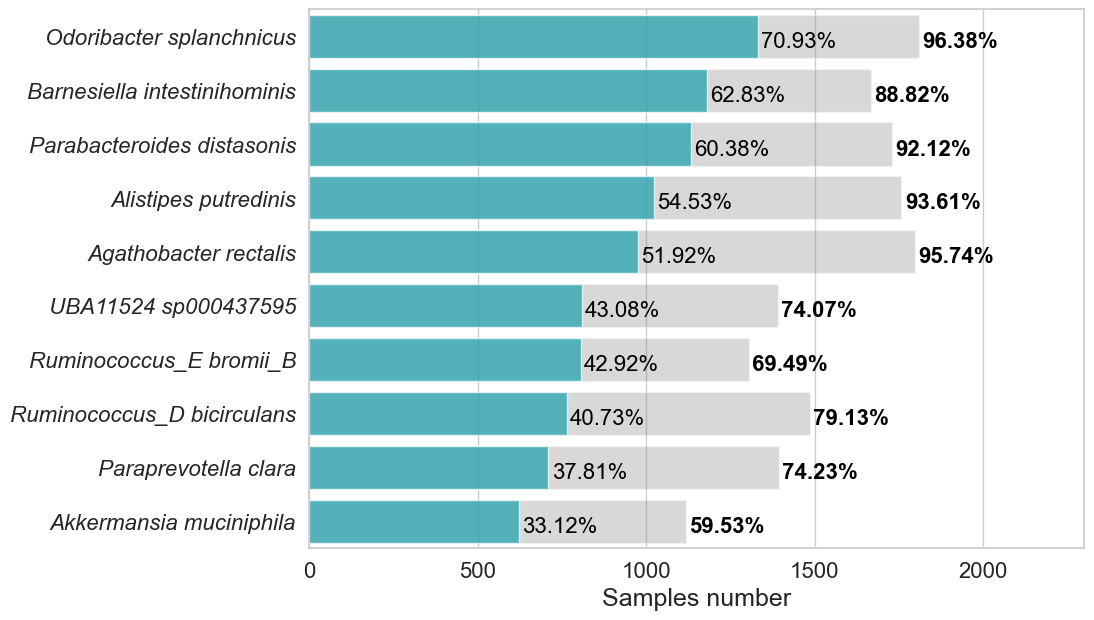

In [63]:
# plot common bins
pic1 = rep.sort_values(by='MAGs_per_cluster', ascending=False).head(10)
pic1 = pic1[['rep_MAG_ID', 'MAGs_per_cluster', 'MAGs_per_cluster_perc','prev_count', 'prevalence', 'present_at_UHGG', 'sp']]
pic1['MAGs_per_cluster_perc'] = pic1['MAGs_per_cluster_perc'].round(2)
pic1['prevalence'] = pic1['prevalence'].round(2)

plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")

sns.barplot(x="prev_count", y="sp", data=pic1, color='grey', alpha=0.3)
sns.barplot(x="MAGs_per_cluster", y="sp", data=pic1, color='#04b4c4', alpha=0.7)
plt.xlim(0, 2300)
# make y labes italic
plt.yticks(fontstyle='italic')

plt.xlabel('Samples number', fontsize=18)
plt.ylabel('', fontsize=18)
plt.tick_params(labelsize=16)

# add annotation one by one with a loop
for line in range(0,pic1.shape[0]):
     plt.text(pic1['prev_count'][line]+10, line+0.2, str(pic1['prevalence'][line]) + '%',
             horizontalalignment='left', color='black', fontsize=16, weight='semibold')
     
# add annotation one by one with a loop
for line in range(0,pic1.shape[0]):
     plt.text(pic1['MAGs_per_cluster'][line]+10, line+0.2, str(pic1['MAGs_per_cluster_perc'][line]) + '%',
             horizontalalignment='left', color='black', fontsize=16)
     
plt.savefig('results/Fig2e_bin_per_cluster_comm.png', dpi=300, bbox_inches='tight')
plt.savefig('results/Fig2e_bin_per_cluster_comm.svg', bbox_inches='tight')

Panel F. Top 15 non overlap sp. Number of recovered genomes and Prevalence by mapping

In [65]:
pic3 = rep[rep['sp'] == 'undefined'].sort_values(by='MAGs_per_cluster', ascending=False).head(10)
pic3 = pic3[['rep_MAG_ID', 'MAGs_per_cluster', 'MAGs_per_cluster_perc','prev_count', 'prevalence', 'present_at_UHGG', 'sp']]
pic3['MAGs_per_cluster_perc'] = pic3['MAGs_per_cluster_perc'].round(2)
pic3['prevalence'] = pic3['prevalence'].round(2)

pic3['genus'] = pic3['rep_MAG_ID'].str.split('_').str[1]
pic3['name'] = 'undefined sp from genus '+pic3['genus']
pic3

,rep_MAG_ID,MAGs_per_cluster,MAGs_per_cluster_perc,prev_count,prevalence,present_at_UHGG,sp,genus,name
360,H0366_Butyricimonas_undS.fa,36,1.92,1056,56.23,EstMAG_overlap,undefined,Butyricimonas,undefined sp from genus Butyricimonas
414,H0410_Gastranaerophilaceae_undG.fa,28,1.49,70,3.73,EstMAG_overlap,undefined,Gastranaerophilaceae,undefined sp from genus Gastranaerophilaceae
416,H0413_UBA7868_undS.fa,28,1.49,51,2.72,EstMAG_unique,undefined,UBA7868,undefined sp from genus UBA7868
507,H0505_Merdousia_undS.fa,20,1.06,96,5.11,EstMAG_overlap,undefined,Merdousia,undefined sp from genus Merdousia
514,H0519_UBA11490_undS.fa,19,1.01,35,1.86,EstMAG_overlap,undefined,UBA11490,undefined sp from genus UBA11490
549,H0546_UMGS902_undS.fa,17,0.91,149,7.93,EstMAG_overlap,undefined,UMGS902,undefined sp from genus UMGS902
590,H0590_RGIG7114_undS.fa,14,0.75,434,23.11,EstMAG_unique,undefined,RGIG7114,undefined sp from genus RGIG7114
613,H0618_SIG673_undS.fa,13,0.69,141,7.51,EstMAG_unique,undefined,SIG673,undefined sp from genus SIG673
623,H0620_UBA9783_undG.fa,13,0.69,34,1.81,EstMAG_overlap,undefined,UBA9783,undefined sp from genus UBA9783
628,H0627_Collinsella_undS.fa,13,0.69,456,24.28,EstMAG_overlap,undefined,Collinsella,undefined sp from genus Collinsella


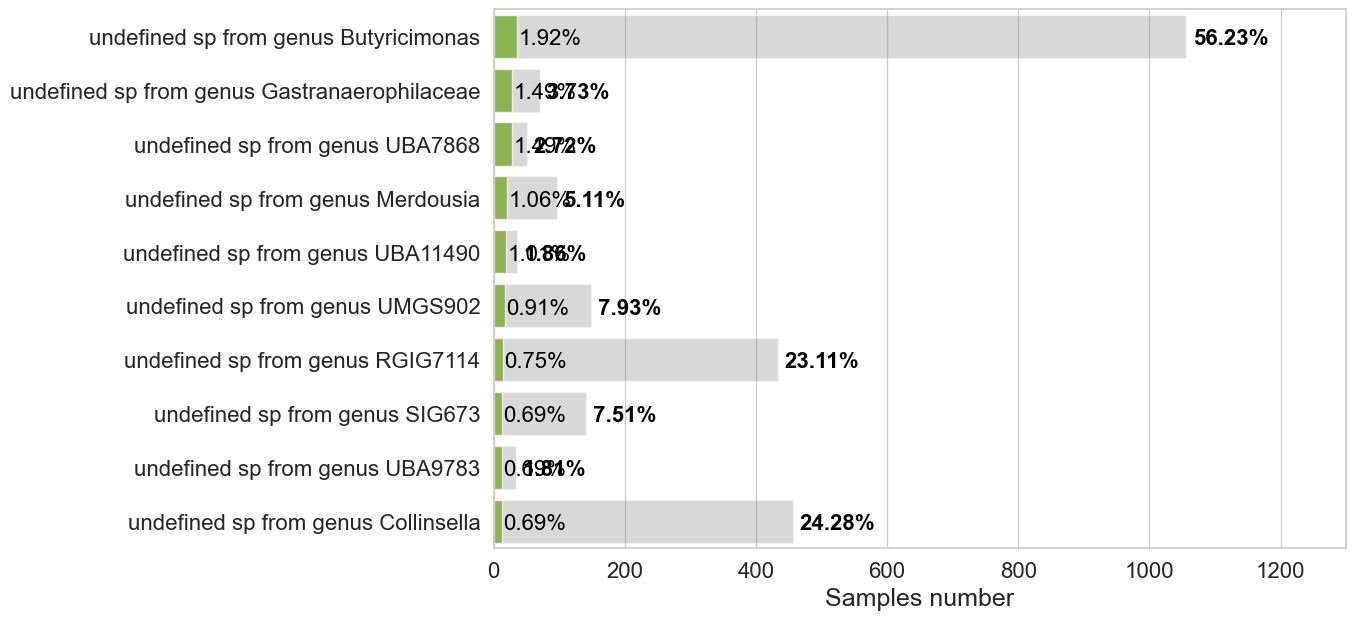

In [75]:
# plot EstUnique bins
pic3 = rep[rep['sp'] == 'undefined'].sort_values(by='MAGs_per_cluster', ascending=False).head(10)
pic3 = pic3[['rep_MAG_ID', 'MAGs_per_cluster', 'MAGs_per_cluster_perc','prev_count', 'prevalence', 'present_at_UHGG', 'sp']]
pic3 = pic3.reset_index()
pic3['MAGs_per_cluster_perc'] = pic3['MAGs_per_cluster_perc'].round(2)
pic3['prevalence'] = pic3['prevalence'].round(2)
pic3['genus'] = pic3['rep_MAG_ID'].str.split('_').str[1]
pic3['name'] = 'undefined sp from genus '+pic3['genus']

plt.figure(figsize=(11, 7))
sns.set(style="whitegrid")

sns.barplot(x="prev_count", y="name", data=pic3, color='grey', alpha=0.3)
sns.barplot(x="MAGs_per_cluster", y="name", data=pic3, color='#70bb03', alpha=0.7)
plt.xlim(0, 1300)
# make y labes italic
#plt.yticks(fontstyle='italic')

plt.xlabel('Samples number', fontsize=18)
plt.ylabel('', fontsize=18)
plt.tick_params(labelsize=16)

# add annotation one by one with a loop
for line in range(0,pic3.shape[0]):
     plt.text(pic3['MAGs_per_cluster'][line]+2, line+0.15, str(pic3['MAGs_per_cluster_perc'][line]) + '%', 
             horizontalalignment='left', color='black', fontsize=16)
     
# add annotation one by one with a loop
for line in range(0,pic3.shape[0]):
     plt.text(pic3['prev_count'][line]+10, line+0.15, str(pic3['prevalence'][line]) + '%', 
             horizontalalignment='left', color='black', weight='semibold', fontsize=16)
     
plt.savefig('results/Fig2f_prev_NewSp.png', dpi=300, bbox_inches='tight')
plt.savefig('results/Fig2f_prev_NewSP.svg', bbox_inches='tight')

### Figure 3. Metagenome-wide association between the abundance of gut bacterial species and disease.
Check at the separate script "EstMB_MWAS.ipyb"

# Supplementary

### Figure S1. Phylum of all representative MAGs.

In [15]:
sns.color_palette("Set3")

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883)]

In [23]:
print(sns.color_palette("Set3").as_hex())

['#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#80b1d3', '#fdb462', '#b3de69', '#fccde5', '#d9d9d9', '#bc80bd', '#ccebc5', '#ffed6f']


In [10]:
phy1['color'] = phy1['phylum'].map({'Bacillota_A': '#8dd3c7', 'Bacteroidota': '#ffed6f', 
                                  'Bacillota': '#80b1d3', 'Bacillota_C': '#b3de69', 
                                  'other': '#d9d9d9', 'Verrucomicrobiota': '#fb8072', 
                                  'Pseudomonadota': '#bebada', 'Cyanobacteriota': '#fccde5',
                                  'Actinomycetota': '#bebada'})
phy

,phylum,count
0,Bacillota_A,1213
1,Bacteroidota,337
2,Bacillota,212
3,Pseudomonadota,159
4,Cyanobacteriota,78
5,Actinomycetota,70
6,Verrucomicrobiota,58
7,Bacillota_C,45
8,Desulfobacterota,29
9,Campylobacterota,12


/var/folders/fr/j_4kmkcj6zs6nglntg64jfgr0000gn/T/ipykernel_47840/1280427735.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  phy1 = phy1.append(new_data, ignore_index=True)


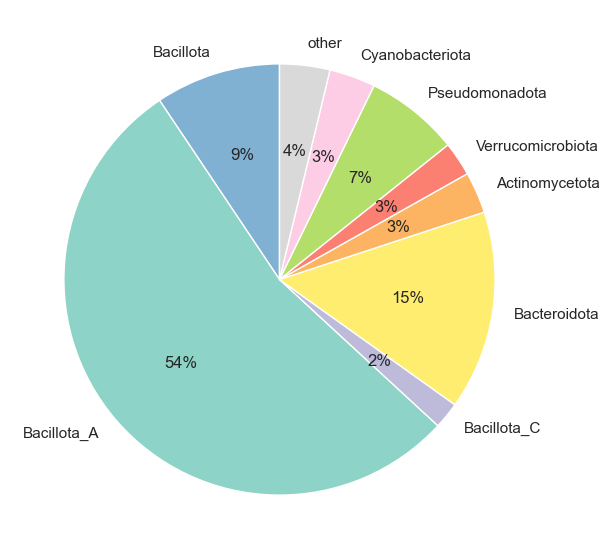

In [19]:
phy = rep['phylum'].value_counts()
phy = phy.reset_index()
phy.rename(columns={'index': "phylum", 'phylum': "count"}, inplace=True)
phy1 = phy.head(8)
phy1 = phy1.sort_values(by='phylum', ascending=False)
other = phy[8:]['count'].sum()
new_data = pd.Series(['other', other], index=phy1.columns)
phy1 = phy1.append(new_data, ignore_index=True)

phy1['color'] = phy1['phylum'].map({'Bacillota_A': '#8dd3c7', 'Bacteroidota': '#ffed6f', 
                                  'Bacillota': '#80b1d3', 'Bacillota_C': '#bebada', 
                                  'other': '#d9d9d9', 'Verrucomicrobiota': '#fb8072', 
                                  'Pseudomonadota': '#b3de69', 'Cyanobacteriota': '#fccde5',
                                  'Actinomycetota': '#fdb462'})

# custom raw order for phy1
phy1 = phy1.reindex([6, 5, 4, 3, 7, 0, 1, 2, 8])

plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")
colors = sns.color_palette("Set3")

# draw a pie plot
plt.pie(phy1['count'], labels=phy1['phylum'], autopct='%1.0f%%', startangle=90, colors=phy1['color'])

plt.savefig('results/S1_phylum.png', dpi=300, bbox_inches='tight')
plt.savefig('results/S1_phylum.svg', bbox_inches='tight')

In [35]:
print(1576+74)
print(328+279)

print(1576+74+328+279)
print(279+74)

1650
607
2257
353


In [30]:
phy1 = phy1.sort_values(by='count', ascending=False)
print('Number of top-3 phyla MAGs', str(phy1[0:3]['count'].sum()), '(', str(phy1[0:3]['count'].sum()/len(rep)*100)[0:5], '%)')
print('Number of Bacillota_A phyla MAGs', str(phy1[0:1]['count'].sum()), '(', str(phy1[0:1]['count'].sum()/len(rep)*100)[0:5], '%)')
print('Number of Bacteroidota phyla MAGs', str(phy1[1:2]['count'].sum()), '(', str(phy1[1:2]['count'].sum()/len(rep)*100)[0:5], '%)')
print('Number of Bacillota phyla MAGs', str(phy1[2:3]['count'].sum()), '(', str(phy1[2:3]['count'].sum()/len(rep)*100)[0:5], '%)')

Number of top-3 phyla MAGs 1762 ( 78.06 %)
Number of Bacillota_A phyla MAGs 1213 ( 53.74 %)
Number of Bacteroidota phyla MAGs 337 ( 14.93 %)
Number of Bacillota phyla MAGs 212 ( 9.392 %)


### Figure S2. Bacterial species with the higher number of MAGs per species cluster.

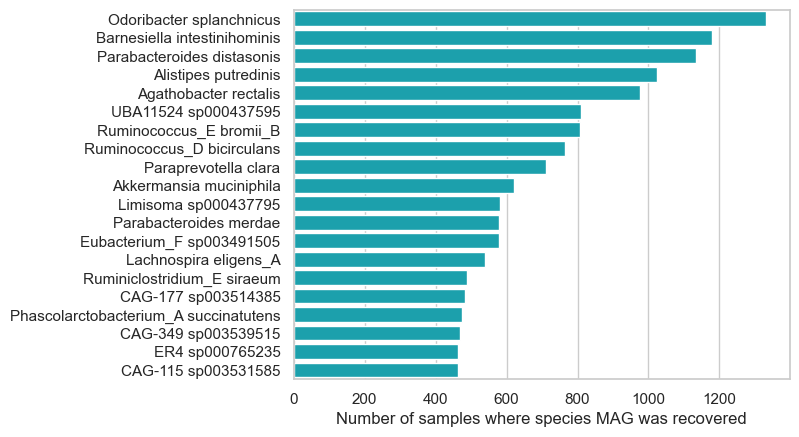

In [76]:
tp_sp = rep[['sp','MAGs_per_cluster']].head(20)
tp_sp = tp_sp.set_index('sp')
sns.barplot(y=tp_sp.index, x='MAGs_per_cluster', data=tp_sp, color='#04b4c4')
plt.ylabel('')
plt.xlabel('Number of samples where species MAG was recovered')

plt.savefig('results/S2_top_sp.png', dpi=300, bbox_inches='tight')
plt.savefig('results/S2_top_sp.svg', bbox_inches='tight')

### Figure S3. Number of recovered genomes per cluster for a new species.

<Figure size 1000x500 with 0 Axes>

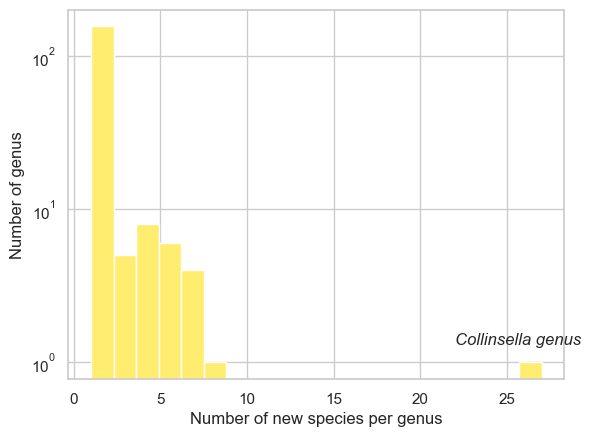

In [69]:
new = rep[rep['sp'] == 'undefined']
s3 = new['genus'].value_counts()
s3 = s3.reset_index()
s3.rename(columns={'index': "genus", 'genus': "count"}, inplace=True)
# skip raw if genus == 'undefined'
s3 = s3[s3['genus'] != 'undefined']

plt.figure(figsize=(10, 5))
s3.hist(bins=20, color='#ffed6f', alpha=1)
plt.xlabel('Number of new species per genus')
plt.ylabel('Number of genus')
plt.title('')
# log scale
plt.yscale('log')

plt.text(22, 1.3, 'Collinsella genus', fontstyle='italic')
plt.savefig('results/S3.png', dpi=300, bbox_inches='tight')
plt.savefig('results/S3.svg', bbox_inches='tight')

### Figure S4. Number of recovered genomes per species. 

In [81]:
rep

,rep_MAG_ID,cluster name,MAGs_per_cluster,genome_length,Completeness,Contamination,MAG_qual,num_seqs,domain,phylum,...,present_at_UHGG,name,perc_MAG,5S_rRNA,16S_rRNA,23S_rRNA,Total_tRNA_Types,MAGs_per_cluster_perc,prev_count,prevalence
0,H0001_Odoribacter_splanchnicus.fa,HQ-591_1,1332,4092605,99.97,0.44,HQ,26,Bacteria,Bacteroidota,...,EstMAG_overlap,Odoribacter splanchnicus,70.93%,3,0,1,21,70.926518,1810,96.379127
1,H0002_Barnesiella_intestinihominis.fa,HQ-671_1,1180,3262506,99.95,0.06,HQ_mimag,38,Bacteria,Bacteroidota,...,EstMAG_overlap,Barnesiella intestinihominis,62.83%,1,2,1,21,62.832801,1668,88.817891
2,H0003_Parabacteroides_distasonis.fa,HQ-631_1,1134,4690993,99.94,0.56,HQ,26,Bacteria,Bacteroidota,...,EstMAG_overlap,Parabacteroides distasonis,60.38%,5,0,1,22,60.383387,1730,92.119276
3,H0004_Alistipes_putredinis.fa,HQ-759_1,1024,2244385,99.99,0.36,HQ,17,Bacteria,Bacteroidota,...,EstMAG_unique,Alistipes putredinis,54.53%,0,1,0,21,54.526092,1758,93.610224
4,H0005_Agathobacter_rectalis.fa,HQ-1045_1,975,2690428,92.38,0.31,HQ,70,Bacteria,Bacillota_A,...,EstMAG_overlap,Agathobacter rectalis,51.92%,0,2,5,22,51.916933,1798,95.740149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,H2248_Ventrimonas_sp900555625.fa,HQ-978_1,1,3044173,99.05,1.96,HQ,36,Bacteria,Bacillota_A,...,EstMAG_overlap,Ventrimonas sp900555625,0.05%,0,1,6,21,0.053248,201,10.702875
2253,H2250_Gastranaerophilus_phascolarctosicola.fa,HQ-98_1,1,1720507,95.45,0.08,HQ,13,Bacteria,Cyanobacteriota,...,EstMAG_overlap,Gastranaerophilus phascolarctosicola,0.05%,0,0,0,21,0.053248,0,0.000000
2254,H2253_Limenecus_undS.fa,HQ-99_1,1,1863551,93.49,0.59,HQ,43,Bacteria,Cyanobacteriota,...,EstMAG_unique,Limenecus undS,0.05%,0,1,0,22,0.053248,2,0.106496
2255,H2255_Frisingicoccus_sp900753685.fa,HQ-995_1,1,2132722,92.35,0.03,HQ,172,Bacteria,Bacillota_A,...,EstMAG_overlap,Frisingicoccus sp900753685,0.05%,0,0,2,19,0.053248,28,1.490948


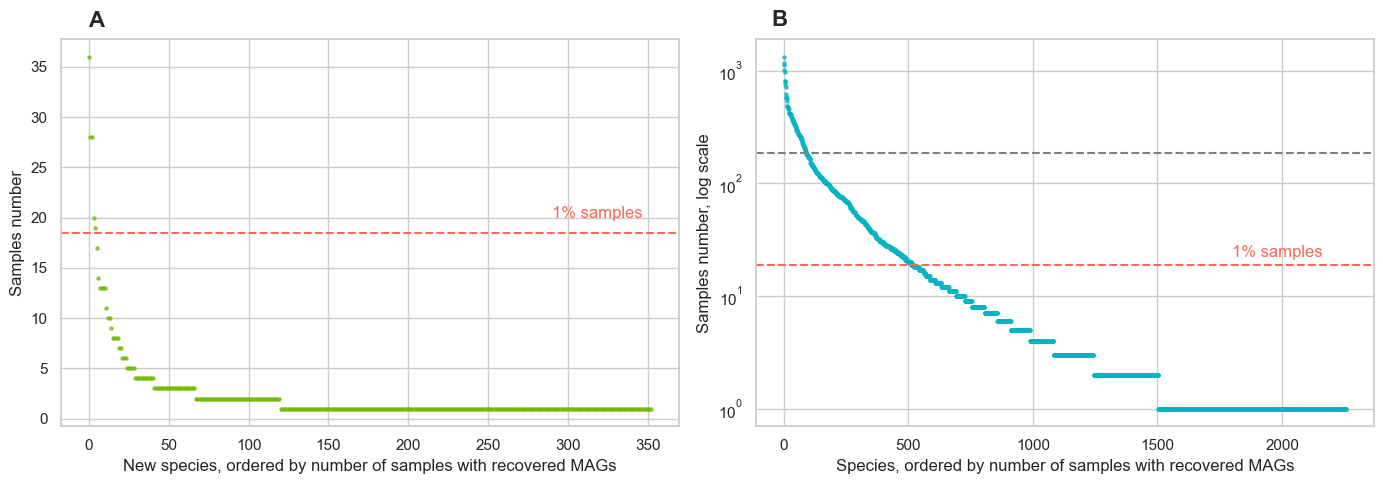

In [82]:
# Prepare the data
repS5 = rep[['sp', 'name', 'MAGs_per_cluster', 'prev_count']].copy()
repS5a = repS5.sort_values(by='MAGs_per_cluster', ascending=False).reset_index(drop=True)
repS5aNew = repS5[repS5['sp'] == 'undefined'].reset_index(drop=True)

# Set up the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
sns.set(style="whitegrid")

# First subplot
axs[0].scatter(repS5aNew.index, repS5aNew['MAGs_per_cluster'], s=5, color='#70bb03', alpha=0.7)
axs[0].axhline(y=18.5, color='#f26b58', linestyle='--')
axs[0].text(0, 39, 'A', fontsize=16, weight='bold')
axs[0].text(290, 20, '1% samples', color='#f26b58')
axs[0].set_ylabel('Samples number')
axs[0].set_xlabel('New species, ordered by number of samples with recovered MAGs')
# Second subplot
axs[1].scatter(repS5.index, repS5['MAGs_per_cluster'], s=5, color='#04b4c4', alpha=0.7)
axs[1].set_yscale('log')
axs[1].axhline(y=19, color='#f26b58', linestyle='--')
axs[1].axhline(y=187, color='grey', linestyle='--')
axs[1].text(-50, 2500, 'B', fontsize=16, weight='bold')
axs[1].text(1800, 22, '1% samples', color='#f26b58')
axs[1].set_ylabel('Samples number, log scale')
axs[1].set_xlabel('Species, ordered by number of samples with recovered MAGs')

# Adjust layout
plt.tight_layout()

# Save the combined figure
plt.savefig('results/S4.png', dpi=150, bbox_inches='tight')
plt.savefig('results/S4.svg', bbox_inches='tight')


### Figure S5. Species prevalence detected by reads mapping against MAGs collection.

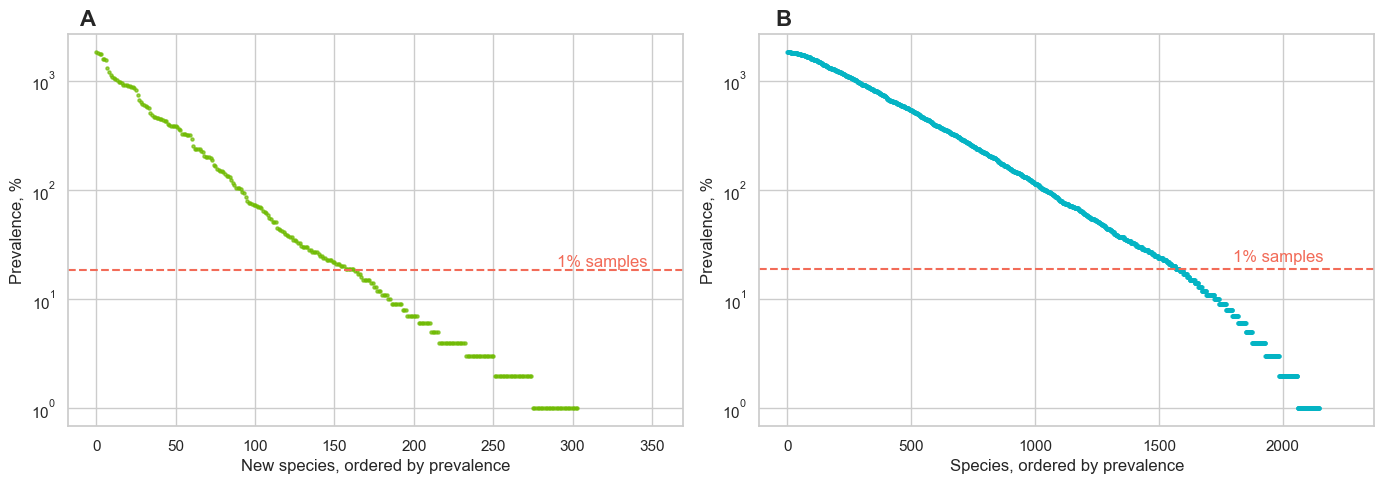

In [83]:
# Set up the figure and subplots
repS5a = repS5.sort_values(by='prev_count', ascending=False).reset_index(drop=True)
repS5aNew = repS5[repS5['sp'] == 'undefined'].reset_index(drop=True)
repS5aNew = repS5aNew.sort_values(by='prev_count', ascending=False).reset_index(drop=True)
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
sns.set(style="whitegrid")

# subplot 1
axs[0].scatter(repS5aNew.index, repS5aNew['prev_count'], s=5, color='#70bb03', alpha=0.7)
axs[0].set_yscale('log')
axs[0].axhline(y=18.5, color='#f26b58', linestyle='--')
axs[0].text(-10, 3200, 'A', fontsize=16, weight='bold')
axs[0].text(290, 20, '1% samples', color='#f26b58')
axs[0].set_ylabel('Prevalence, %')
axs[0].set_xlabel('New species, ordered by prevalence')

# subplot 2
axs[1].scatter(repS5a.index, repS5a['prev_count'], s=5, color='#04b4c4', alpha=0.7)
axs[1].set_yscale('log')
axs[1].axhline(y=19, color='#f26b58', linestyle='--')
axs[1].text(-50, 3200, 'B', fontsize=16, weight='bold')
axs[1].text(1800, 22, '1% samples', color='#f26b58')
axs[1].set_ylabel('Prevalence, %')
axs[1].set_xlabel('Species, ordered by prevalence')
# Adjust layout
plt.tight_layout()

# Save the combined figure
plt.savefig('results/S5.png', dpi=150, bbox_inches='tight')
plt.savefig('results/S5.svg', bbox_inches='tight')


### Figure S6. Relationship between Species Prevalence and number of samples where species genome was assembled.

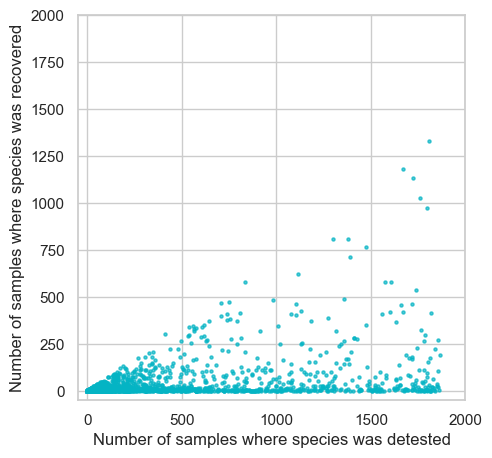

In [27]:
plt.figure(figsize=(5, 5))
sns.set(style="whitegrid")
repS6 = rep[['sp','MAGs_per_cluster','prevalence_by_mapping']].copy()
repS6['mapp_nmb'] = repS6['prevalence_by_mapping']/2101*1878

plt.scatter(repS6['mapp_nmb'],repS6['MAGs_per_cluster'], s=5, color='#04b4c4', alpha=0.7)
plt.xlabel('Number of samples where species was detested')
plt.ylabel('Number of samples where species was recovered')
plt.xlim(-50, 2000)
plt.ylim(-50, 2000)
plt.xticks(np.arange(0, 2001, 500))
#plt.yticks(np.arange(0, 2001, 500))

plt.savefig('results/S6.png', dpi=300, bbox_inches='tight')
plt.savefig('results/S6.svg', bbox_inches='tight')